#### pandas 1
In this exercise, you are asked to obtain some market data, manipulate and plot the data, and compute portfolio returns of simple investment strategies.

1. Please download data for Cardano, Solana, Dogecoin, and Ethereum, from 2020 until today from Yahoo Finance (e.g. using pandas datareader), assigning the data of each cryptocurrency to a separate DataFrame. Remove any duplicate dates contained in the data (hint: try and find out how to use `groupby` for this purpose). Print the date of the first observation for each instrument.

In [1]:
# For testing groupby and mean approach:
# df1 = pd.DataFrame(np.array([[12, 16, 5, 8], [6, 12, 2, 5],[7, 5, 1, 5],[3, 77, 5, 7],[14, 2, 4, 9],[78,4,4,34],[7,5,1,5],[12,16,5,8],[3,77,5,7]]))
# df1.columns=['high','low','close','open']
# df1.index=['2005','2006','2007','2008','2009','2010','2007','2005','2008']
# df1.index.name = "year"
# print(df1)
# print("-----------------------------------")
# print(df1.groupby('year').mean())

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np 
import pandas_datareader.data as web

crypto1 = "ADA-USD"
crypto2 = "SOL1-USD"
crypto3 = "DOGE-USD"
crypto4 = "ETH-USD"

#First we load the data from yahoo
df0=web.DataReader(crypto1,'yahoo',start = '2020', end = '2021-12-04')
df1=web.DataReader(crypto2,'yahoo',start = '2020',end = '2021-12-04')
df2=web.DataReader(crypto3,'yahoo',start = '2020',end = '2021-12-04')
df3=web.DataReader(crypto4,'yahoo',start = '2020',end = '2021-12-04')

#We group the data by date and take its mean, so in case there are multiple values for one cryptocurrency in one day, we take the mean of these values
df0_unique = df0.groupby('Date').mean()
df1_unique = df1.groupby('Date').mean()
df2_unique = df2.groupby('Date').mean()
df3_unique = df3.groupby('Date').mean()

#We print the resulting first rows
print(f"First row of {crypto1}:")
print(df0_unique[:1])
print("________________________________________________________\n")
print(f"First row of {crypto2}:")
print(df1_unique[:1])
print("________________________________________________________\n")
print(f"First row of {crypto3}:")
print(df2_unique[:1])
print("________________________________________________________\n")
print(f"First row of {crypto4}:")
print(df3_unique[:1])


First row of ADA-USD:
                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2020-01-01  0.033813  0.032704  0.032832  0.033458  22948374.0   0.033458
________________________________________________________

First row of SOL1-USD:
                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2020-04-10  1.313487  0.694187  0.832005  0.951054  87364276.0   0.951054
________________________________________________________

First row of DOGE-USD:
                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2020-01-01  0.002052  0.002021  0.002028  0.002033  51180941.0   0.002033
________________________________________________________

First row of ETH-USD:
                  High         Low        Open       Close        Volu

2. You will find that there is no data available at the beginning of 2020 for one or more of the instruments. Combine the closing prices of all four instruments in one DataFrame, starting on the first date for which data is available for all of them. Replace any missing values by forward-filling data from earlier days. Compute and display the pair-wise correlations between each pair of cryptocurrencies' daily returns (look up the method `corr`).

In [2]:
#Start by loading the closing prices of the cryptocurrencies in one DataFrame
closing_prices = pd.DataFrame({crypto1: df0_unique.Close, crypto2: df1_unique.Close, crypto3: df2_unique.Close, crypto4: df3_unique.Close})

#Next, we look for the index from which we have data for all 4 cryptocurrencies
##closing_prices.loc['2021-11-22'] = [float("NaN"), 234, float("NaN"), 321] - to test if our fillna works
b = closing_prices.index[(pd.isna(closing_prices[crypto1]) == False) & (pd.isna(closing_prices[crypto2]) == False) & (pd.isna(closing_prices[crypto3]) == False) & (pd.isna(closing_prices[crypto4]) == False)][0]
#We crop the initial DataFrame to have data of the different cryptos for every single day specified in the DataFrame
clp = closing_prices[b:]

print('Closing prices started from ', b)
print(clp)

#Replace any mssing values in the new DataFrame with the "ffill" function
clp_filled = clp.fillna(method='ffill')
#Lastly, we compute the correlation table of the filled DataFrame
clp_filled.corr() 


Closing prices started from  2020-04-10 00:00:00
             ADA-USD    SOL1-USD  DOGE-USD      ETH-USD
Date                                                   
2020-04-10  0.033215    0.951054  0.001968   158.412445
2020-04-11  0.033354    0.776819  0.001990   158.216019
2020-04-12  0.033806    0.882507  0.001990   161.142426
2020-04-13  0.033107    0.777832  0.001959   156.279556
2020-04-14  0.032974    0.661925  0.001964   157.596390
...              ...         ...       ...          ...
2021-11-30  1.554903  208.670990  0.214715  4631.479004
2021-12-01  1.547713  229.799240  0.209487  4586.990234
2021-12-02  1.715366  233.993042  0.209726  4511.302246
2021-12-03  1.556555  211.224396  0.199993  4220.706055
2021-12-04  1.424229  206.460037  0.177261  4060.245605

[600 rows x 4 columns]


,ADA-USD,SOL1-USD,DOGE-USD,ETH-USD
ADA-USD,1.000000,0.766123,0.838095,0.936559
SOL1-USD,0.766123,1.000000,0.570232,0.850518
DOGE-USD,0.838095,0.570232,1.000000,0.844268
ETH-USD,0.936559,0.850518,0.844268,1.000000


3. Rescale all prices by dividing them by the prices on the day when the time series now begin. Plot the whole time series of the rescaled closing prices for all four instruments.

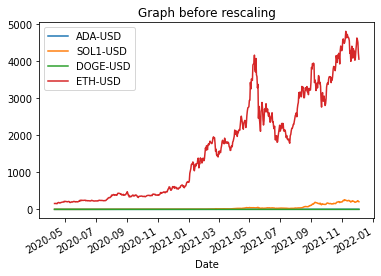

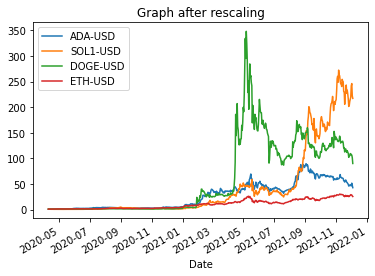

In [3]:
# Rescaling by the first row 
rescaled = clp_filled.div(closing_prices.loc[b])

# Plot the graph without rescaling to compare
clp_filled.plot()
plt.title('Graph before rescaling')
plt.show()

# Plot rescaled graph
rescaled.plot()
plt.title('Graph after rescaling')
plt.show()

4. Consider two investment strategies: 
(a) one that invests in the cryptocurrency with the highest return every day,
(b) one that invests in the cryptocurrency with the highest volatility every day, where volatility is defined as the difference between the daily high and low prices divided by the opening price.
Assume that the purchases and sales always happen at the closing price of the same day. Compute the standard deviation of the strategies' daily returns.

In [5]:
#________A_________#

# Calculating daily returns in % using the formula: (Today closing price - yesterday closing price) / Yesterday closing price
returns_ADA = ((clp_filled[crypto1] - clp_filled[crypto1].shift(1)) /  clp_filled[crypto1].shift(1)) * 100
returns_SOL1 = ((clp_filled[crypto2] - clp_filled[crypto2].shift(1)) /  clp_filled[crypto2].shift(1)) * 100
returns_DOGE = ((clp_filled[crypto3] - clp_filled[crypto3].shift(1)) /  clp_filled[crypto3].shift(1)) * 100
returns_ETH = ((clp_filled[crypto4] - clp_filled[crypto4].shift(1)) /  clp_filled[crypto4].shift(1)) * 100

# Daily returns for all 4 cryptocurrencies on one dataframe
dr = pd.DataFrame({crypto1: returns_ADA, crypto2: returns_SOL1, crypto3: returns_DOGE, crypto4: returns_ETH})

# We check the daily return of which stock was the maximum in each row and create corresponding 2 columns to check results visually
dr['Max_return'] = dr.max(axis=1)
dr['Purchase_name'] = dr.idxmax(axis=1)

# We compute the standard deviation of the max returns
std_a = dr.Max_return.std()


#________B_________#

# We create 3 DataFrames with the respective high prices, low prices and opening prices for every cryptocurrency for every day
high = pd.DataFrame({crypto1: df0_unique.High, crypto2: df1_unique.High, crypto3: df2_unique.High, crypto4: df3_unique.High})
low = pd.DataFrame({crypto1: df0_unique.Low, crypto2: df1_unique.Low, crypto3: df2_unique.Low, crypto4: df3_unique.Low})
opening_prices = pd.DataFrame({crypto1: df0_unique.Open, crypto2: df1_unique.Open, crypto3: df2_unique.Open, crypto4: df3_unique.Open})

# As earlier, we look for the index for which we have data about all cryptocurrencies
c = high.index[(pd.isna(high[crypto1]) == False) & (pd.isna(high[crypto2]) == False) & (pd.isna(high[crypto3]) == False) & (pd.isna(high[crypto4]) == False)][0]

# We compute the volatility according to the formula given in the excervise description
volatility = (high[c:]-low[c:])/opening_prices[c:]*100

# Create two columns with the max volatility crypto for the day and the respective name of the currency
volatility['Max_volatility'] = volatility.max(axis=1)
volatility['Purchase_name'] = volatility.idxmax(axis=1)

# We compute the standard deviation of the max volatilities
std_b = volatility.Max_volatility.std()



# Printing the results
print(f'Standard deviation of a is: {round(std_a, 2)}%\nStandard deviation of b is: {round(std_b, 2)}%')
# dr
#volatility

Standard deviation of a is: 15.03%
Standard deviation of b is: 13.86%


5. Assuming you invest 100 at the beginning of the sample period, compute the value of the investment portfolios following each of the strategies over time. Plot the time-series of the values of the two portfolios. 

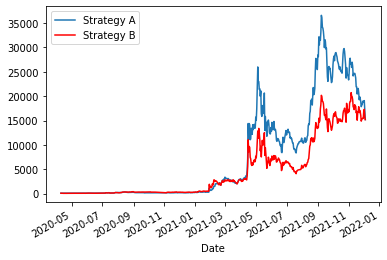

,ADA-USD,SOL1-USD,DOGE-USD,ETH-USD,Max_volatility,Purchase_name,Purchase_price,Sell_name,Sell_price,Money_B
Date,,,,,,,,,,
2020-04-10,10.217908,74.434655,6.531424,9.386737,74.434655,SOL1-USD,0.951054,-,-,100.000000
2020-04-11,3.733253,29.867176,3.201214,3.702075,29.867176,SOL1-USD,0.776819,SOL1-USD,0.776819,81.679800
2020-04-12,4.779614,24.730340,2.916037,5.180002,24.730340,SOL1-USD,0.882507,SOL1-USD,0.882507,92.792528
2020-04-13,5.212837,13.205236,4.824122,5.683904,13.205236,SOL1-USD,0.777832,SOL1-USD,0.777832,81.786312
2020-04-14,2.732239,21.637451,2.298263,3.247934,21.637451,SOL1-USD,0.661925,SOL1-USD,0.661925,69.599101
...,...,...,...,...,...,...,...,...,...,...
2021-11-30,4.903557,8.938348,6.340449,8.885173,8.938348,SOL1-USD,208.670990,DOGE-USD,0.214715,15428.604241
2021-12-01,5.655908,11.628956,5.687058,5.416897,11.628956,SOL1-USD,229.799240,SOL1-USD,229.79924,16990.773517
2021-12-02,15.197851,9.886457,9.949589,4.086317,15.197851,ADA-USD,1.715366,SOL1-USD,233.993042,17300.852601


In [60]:
#________A_________#

# We cannot calculate daily return for the first day (missing closing prices for yesterday), the first row will contain 'nan'.

dr['Purchase_name'] = dr.Purchase_name.fillna('-') # To avoid future miscalculations with 'nan', we replace 'nan' with '-'
dr['Purchase_price'] = 0 # Here we create a column and fill it with zeros. Then we will change these values in for loop
for i in range(0,len(dr)):
    if dr.iloc[i, 5] == '-':
        dr.iloc[i, 6] = '-'
    else:
        dr.iloc[i, 6] = clp_filled.at[dr.index[i], dr.Purchase_name[i]]

dr['Sell_name'] = dr.Purchase_name.shift(1).fillna('-')
dr['Sell_price'] = 0
for i in range(0,len(dr)):
    if dr.iloc[i, 7] == '-':
        dr.iloc[i, 8] = '-'
    else:
        dr.iloc[i, 8] = clp_filled.at[dr.index[i], dr.Sell_name[i]]

investment = 100 # Our initial investment is 
dr['Money_A'] = investment # Creating the column and filling it with value 100 initially. The values are then changed in for loop.

for i in range(1, len(dr)-1):
    # We purchase maximum cryptocurrency for the price found in [i,6]
    # We sell all our cryptocurrency for the closing price of the next day found in [i,8]
    investment = (investment / dr.iloc[i,6]) * dr.iloc[i+1,8]
    dr.iloc[i+1, 9] = investment


#dr.to_excel('investments.xlsx')


#________B_________#


volatility['Purchase_price'] = 0 # Here we create a column and fill it with zeros. Then we will change these values in for loop
for i in range(0,len(volatility)):
    volatility.iloc[i, 6] = clp_filled.at[volatility.index[i], volatility.Purchase_name[i]]

volatility['Sell_name'] = volatility.Purchase_name.shift(1).fillna('-')
volatility['Sell_price'] = 0
for i in range(0,len(volatility)):
    if volatility.iloc[i, 7] == '-':
        volatility.iloc[i, 8] = '-'
    else:
        volatility.iloc[i, 8] = clp_filled.at[volatility.index[i], volatility.Sell_name[i]]

investment = 100
volatility['Money_B'] = investment # Creating the column and filling it with value 100 initially. The values are then changed in for loop.

for i in range(0, len(volatility)-1):
     # We purchase maximum cryptocurrency for the price found in [i,6]
     # We sell all our cryptocurrency for the closing price of the next day found in [i,8]
    investment = (investment / volatility.iloc[i,6] ) * volatility.iloc[i+1,8] 
    volatility.iloc[i+1, 9] = investment

dr.Money_A.plot(label='Strategy A')  
volatility.Money_B.plot(color='r', label='Strategy B')
plt.legend()
plt.show()


# dr
volatility